# Course:  Convolutional Neural Networks for Image Classification

## Section-1

<span style="font-size:14pt">Quick Win #2: Pooling</span>  
  
<span style="font-size:14pt">**Description:**</span>  
<span style="font-size:13pt">*Apply max pooling operation to grayscale image*</span>  
<span style="font-size:13pt">*Demonstrate downsampled output image*</span>  
  
<span style="font-size:13pt">**File:** *pooling.ipynb*</span>

<span style="font-size:14pt">**Algorithm:**</span>  
  
<span style="font-size:13pt">**-->** Reading coloured image</span>  
<span style="font-size:13pt">**-->** Converting image to GRAY</span>  
<span style="font-size:13pt">**-->** Implementing max pooling operation to GRAY image</span>  
  
<span style="font-size:13pt">**Result:**
Plot with input GRAY image and downsampled image after pooling</span>

## Importing libraries

In [9]:
# Importing needed libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Importing library to see calculation progress inside loops in Real Time
# To install, use following command: pip install tqdm
# Don't forget to activate environment in which you're working
from tqdm import tqdm


## Opening input image and converting it into GRAY

In [10]:
# Reading coloured input image by OpenCV library
# In this way image is opened already as Numpy array

# (!) OpenCV by default reads image in BGR format (order of channels)
# (!) On Windows, the path might look like following:
# r'images\cat.png'
# or:
# 'images\\cat.png'
image_BGR = cv2.imread('images/cat.png')


# Converting input image to GRAY by OpenCV function
image_GRAY = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2GRAY)


# Check point
# Showing type and shape of loaded coloured image
# Showing shape of GRAY image
print('Type of image_BGR is:', type(image_BGR))
print('Shape of image_BGR is:', image_BGR.shape)
print('Shape of image_GRAY is:', image_GRAY.shape)


Type of image_BGR is: <class 'numpy.ndarray'>
Shape of image_BGR is: (853, 1280, 3)
Shape of image_GRAY is: (853, 1280)


## Applying pooling operation to GRAY image

### Setting hyperparameters and preparing output array

In [11]:
# Preparing hyperparameters for pooling
# To get resulted image after pooling,
# it is needed to set following:
# filter size for pooling (width and height are equal)
f_pooling = 2
# stride (step) for sliding
step = 2

# Output image's dimension is calculated by following equations:
# height_out = (height_in - f_pooling) / step + 1
# width_out = (width_in - f_pooling) / step + 1

# For instance, input GRAY image is 1280x720 of spatial size (width and height),
# then output image after pooling will be as following:
# height_out = (720 - 2) / 2 + 1 = 360
# width_out = (1280 - 2) / 2 + 1 = 640


# Calculating spatial size of output resulted array (width and height)
# Making output width and height as integer numbers,
# in case input width/height is odd
height_out = int((image_GRAY.shape[0] - 2) / 2 + 1)
width_out = int((image_GRAY.shape[1] - 2) / 2 + 1)


# Preparing zero valued output array for image after pooling
image_after_pooling = np.zeros((height_out, width_out))


# Check point
# Showing shape of image after pooling
print('Shape of image after pooling is:', image_after_pooling.shape)


Shape of image after pooling is: (426, 640)


### Pooling operation to GRAY image

In [12]:
# Preparing indexes for rows of output array
ii = 0

# Sliding through entire input GRAY image
# Wrapping the loop with 'tqdm' in order to see progress in real time
for i in tqdm(range(0, image_GRAY.shape[0] - f_pooling + 1, step)):
    # Preparing indexes for columns of output array
    jj = 0

    for j in range(0, image_GRAY.shape[1] - f_pooling + 1, step):
        # Extracting (slicing) a 2x2 patch (the same size with filter)
        # from input GRAY image
        patch = image_GRAY[i:i+f_pooling, j:j+f_pooling]

        # Applying max pooling operation - choosing maximum element
        # from the current patch
        image_after_pooling[ii, jj] = np.max(patch)

        # Increasing indexes for rows of output array
        jj += 1

    # Increasing indexes for columns of output array
    ii += 1


100%|██████████| 426/426 [00:01<00:00, 319.91it/s]


### Plotting resulted downsampled image after pooling

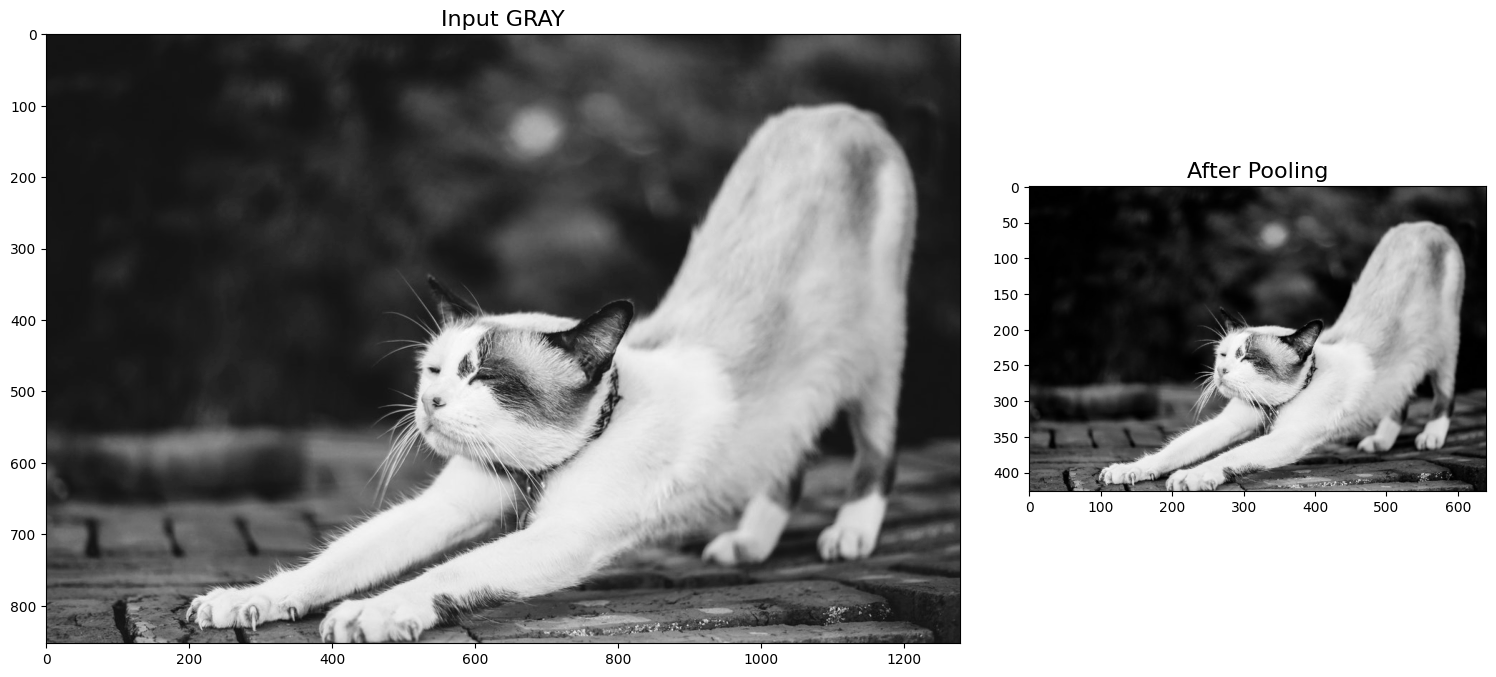

In [13]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (18.0, 10.0)


# Defining a figure object with number of needed subplots
# ax is a (2,) Numpy array and to access specific subplot we call it by ax[0]
# 'gridspec_kw' is the dictionary with keywords to specify the ratio of subplots
figure, ax = plt.subplots(nrows=1, ncols=2,
                          gridspec_kw={'width_ratios': [2, 1]})


# Adjusting first column with input GRAY image
ax[0].imshow(image_GRAY, cmap=plt.get_cmap('gray'))


# Adjusting second column with GRAY image after pooling
ax[1].imshow(image_after_pooling, cmap=plt.get_cmap('gray'))


# Giving names to columns
ax[0].set_title('Input GRAY', fontsize=16)
ax[1].set_title('After Pooling', fontsize=16)


# Adjusting distance between subplots
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.1, hspace=0.9)


# Saving the plot
# (!) On Windows, the path might look like following:
# r'images\plot_pooling.png'
# or:
# 'images\\plot_pooling.png'
figure.savefig('images/plot_pooling.png')


# Showing the plot
plt.show()


### Some comments
  
<span style="font-size:13pt">To get more details of usage subplots from matplotlib library:</span>  
<span style="font-size:13pt">**print(help(plt.subplots))**</span>  
<span style="font-size:13pt">**print(help(plt.subplots_adjust))**</span>  
  
<span style="font-size:13pt">More details and examples are here:</span>  
<span style="font-size:13pt">https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplots.html</span>

In [14]:
print(help(plt.subplots))

Help on function subplots in module matplotlib.pyplot:

subplots(nrows: 'int' = 1, ncols: 'int' = 1, *, sharex: "bool | Literal['none', 'all', 'row', 'col']" = False, sharey: "bool | Literal['none', 'all', 'row', 'col']" = False, squeeze: 'bool' = True, width_ratios: 'Sequence[float] | None' = None, height_ratios: 'Sequence[float] | None' = None, subplot_kw: 'dict[str, Any] | None' = None, gridspec_kw: 'dict[str, Any] | None' = None, **fig_kw) -> 'tuple[Figure, Any]'
    Create a figure and a set of subplots.

    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.

    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.

    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:

        - True or 'all': x- or y-axis will be shared amon

In [15]:
print(help(plt.subplots_adjust))

Help on function subplots_adjust in module matplotlib.pyplot:

subplots_adjust(left: 'float | None' = None, bottom: 'float | None' = None, right: 'float | None' = None, top: 'float | None' = None, wspace: 'float | None' = None, hspace: 'float | None' = None) -> 'None'
    Adjust the subplot layout parameters.

    Unset parameters are left unmodified; initial values are given by
    :rc:`figure.subplot.[name]`.

    Parameters
    ----------
    left : float, optional
        The position of the left edge of the subplots,
        as a fraction of the figure width.
    right : float, optional
        The position of the right edge of the subplots,
        as a fraction of the figure width.
    bottom : float, optional
        The position of the bottom edge of the subplots,
        as a fraction of the figure height.
    top : float, optional
        The position of the top edge of the subplots,
        as a fraction of the figure height.
    wspace : float, optional
        The width o